### Contents

* [1. Problem formulation](#1)
* [2. Collecting the data](#2)
* [3. Exploratory Data Analysis (EDA)](#3)
* [4. Data Preprocessing](#4)
* [5. Choosing and Training a model](#5)
* [6. Evaluating a model](#6)

<a name='1'><a>
# **1. Problem Formulation**

---

## 🏡 Objective

To develop a predictive model that estimates a property’s **market value (home price)** based on its physical attributes, location, and other real-estate-related features.

---

## 🧾 Dataset Overview

**Source:** [Home Value Insights dataset – Kaggle](https://www.kaggle.com/datasets/prokshitha/home-value-insights/data)

**Features:** Includes property characteristics such as the number of bedrooms, bathrooms, lot area, house size, year built, location information, and other structural or neighborhood indicators. *(Actual columns may vary depending on the dataset.)*

**Target Variable:** The **House_Price** — a continuous numeric variable representing the market price of the house.

---

## 🎯 Problem Statement

Using the given property-related features:

* Build a **machine learning regression model** that predicts the **sale price** of a home.
* Identify which features (e.g., number of rooms, location, square footage, age) have the strongest impact on price.
* Evaluate model performance and ensure the predictions generalize well to unseen homes.

---

## 💡 Why this is Important

* Accurate home value predictions can guide **buyers, sellers, and real estate agents** in making informed pricing decisions.
* It helps in **understanding key factors** that influence housing prices in a given area.
* Provides an opportunity to apply **data analytics and machine learning** for real-world business and investment insights.

---

## ⚙️ Challenges & Considerations

* **Data quality:** Missing or inconsistent entries (e.g., missing square footage, outlier prices).
* **Feature scaling:** Large differences between numerical feature ranges (e.g., lot area vs. number of rooms).
* **Categorical encoding:** Handling non-numeric variables like neighborhood or property type.
* **Outliers:** Extremely high-value properties may skew the model.
* **Model interpretability:** Important not just to predict, but to explain *why* certain properties are priced higher or lower.

---

## ✅ Expected Outcome

* A regression model capable of accurately estimating **home prices** (evaluated via RMSE, MAE, and R²).
* A **ranked list of most influential features** on home value (via model coefficients or feature importance).
* **Insights and recommendations** such as:

  * “Properties with more than 3 bedrooms and located in urban centers tend to have 25% higher prices.”
  * “Lot size and house age show strong non-linear effects on value.”

---

<a name='2'><a>
# **2. Collecting the Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('/content/house_price_regression_dataset.csv')
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


### 🧩 Feature Information

| **Feature Name**           | **Description**                                                                                                                     | **Data Type**       |
| -------------------------- | ----------------------------------------------------------------------------------------------------------------------------------- | ------------------- |
| **Square_Footage**         | The size of the house in square feet. Larger homes typically have higher prices.                                                    | Numeric (float/int) |
| **Num_Bedrooms**           | The number of bedrooms in the house. More bedrooms generally increase the value of a home.                                          | Numeric (int)       |
| **Num_Bathrooms**          | The number of bathrooms in the house. Houses with more bathrooms are typically priced higher.                                       | Numeric (int/float) |
| **Year_Built**             | The year the house was built. Older houses may be priced lower due to wear and tear.                                                | Numeric (int)       |
| **Lot_Size**               | The size of the lot the house is built on, measured in acres. Larger lots tend to add value to a property.                          | Numeric (float)     |
| **Garage_Size**            | The number of cars that can fit in the garage. Houses with larger garages are usually more expensive.                               | Numeric (int)       |
| **Neighborhood_Quality**   | Rating of the neighborhood’s quality on a scale of 1–10 (10 = highest quality). Better neighborhoods usually command higher prices. | Numeric (int)       |
| **house_price** *(Target)* | The selling price or market value of the home (the variable to be predicted).                                                       | Numeric (float)     |

---

In [3]:
df.shape

(1000, 8)

<a name='3'><a>
# **3. Exploratory Data Analysis**

In [4]:
# Checking the dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [5]:
# Generating statistical summary of numerical columns

df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [6]:
# Checking for missing values in each column

df.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


In [7]:
# Checking for duplicate rows in the dataset

df.duplicated().sum()

np.int64(0)

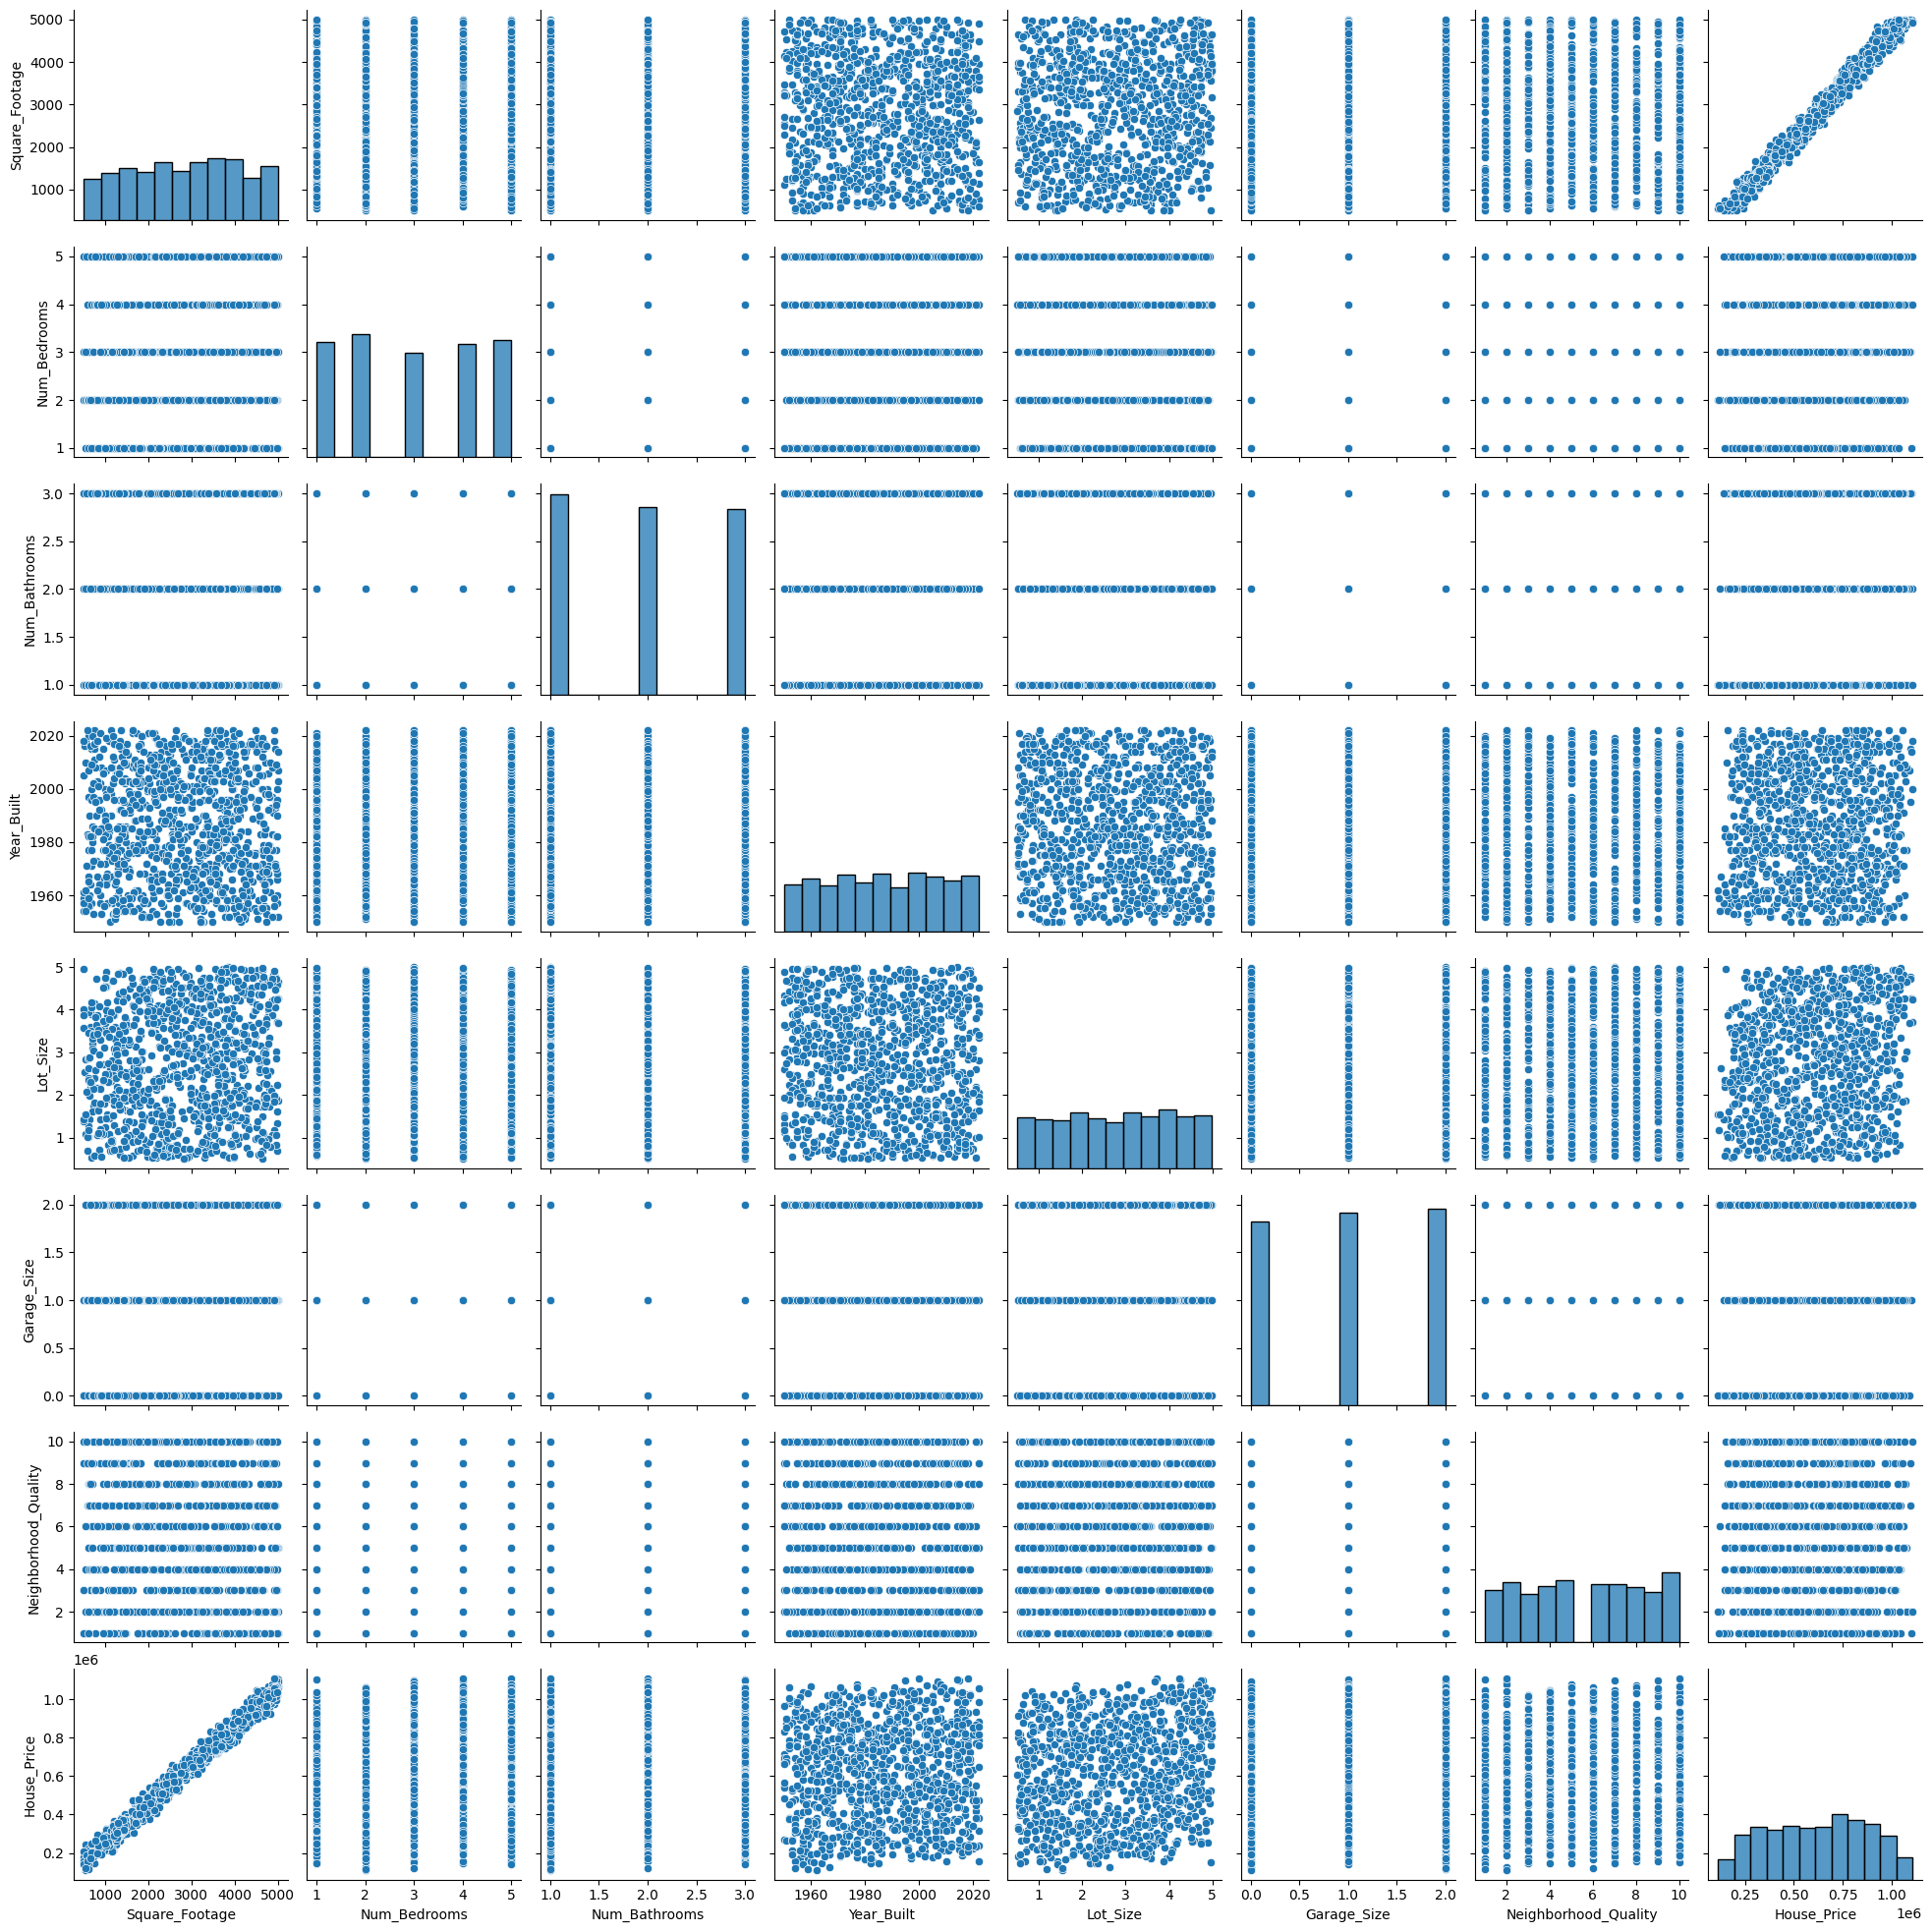

In [8]:
# Visualizing pairwise relationships between numerical features

sns.pairplot(df)

Text(0.5, 1.0, 'Distribution of House Prices')

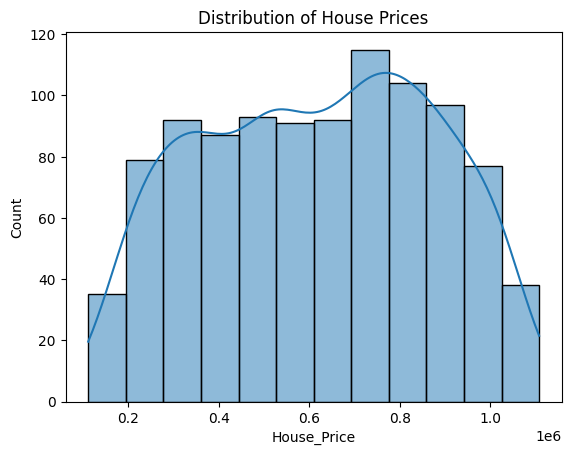

In [9]:
# Plotting the distribution of house prices

sns.histplot(df['House_Price'], kde=True)  # kde=True adds the kernel density estimate
plt.title('Distribution of House Prices')

Text(0.5, 1.0, 'Relationship between Square Footage and House Price')

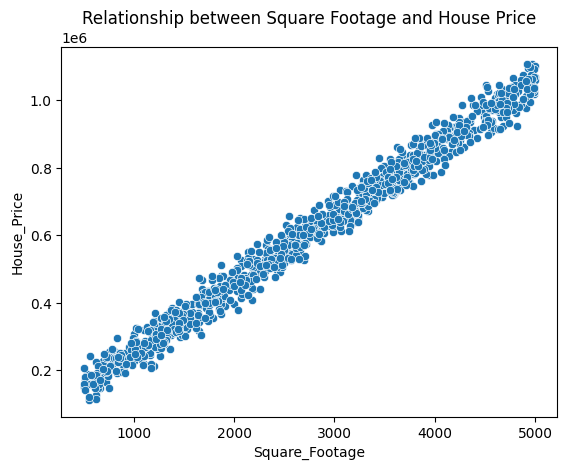

In [10]:
# Scatter plot for the relationship between Square Footage and House Price

sns.scatterplot(x='Square_Footage', y='House_Price', data=df)
plt.title('Relationship between Square Footage and House Price')

Text(0.5, 1.0, 'Correlation Matrix')

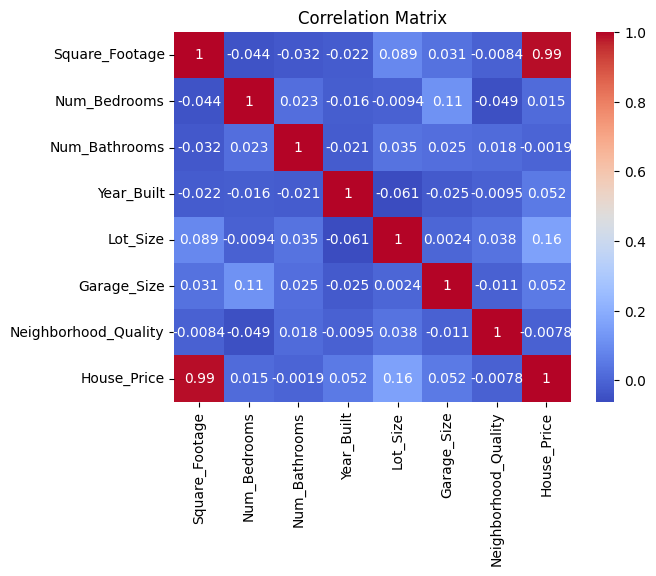

In [11]:
# Plotting the correlation heatmap

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

<a name='4'><a>
# **4. Data Preprocessing**

* Making data ready for the ML model.
* Applying the same steps to train and test sets.

    Key steps:
    * Filling missing values
    * Converting categorical features to numbers
    * Scaling numeric features

* Using functions wherever possible to apply the same steps consistently.

In [12]:
from sklearn.model_selection import train_test_split

# Defining feature columns and target variable
X = df.drop('House_Price', axis=1)  # features
y = df['House_Price']               # target

# Splitting the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (800, 7)
Testing set shape: (200, 7)


In [13]:
X_train.head(3)

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
29,2028,2,3,1967,1.784790,2,2
535,3519,5,3,1966,4.009947,0,10
695,4507,2,3,2014,4.122337,0,7


In [14]:
y_train.head(3)

,House_Price
29,434165.896634
535,788284.690202
695,985499.196316


### Scaling numerical features

In [15]:
from sklearn.preprocessing import StandardScaler

num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

<a name='5'><a>
# **5. Choosing and Training a Model**

In [16]:
from sklearn.tree import DecisionTreeRegressor

# Creating the model
model = DecisionTreeRegressor(random_state=42)

# Training the model
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

<a name='6'><a>
# **6. Model Evaluation**

In [17]:
# Predicting on train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [19]:
# Calculating metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Test R2:   ", r2_score(y_test, y_test_pred))

# Converting to percentage
accuracy_percent = r2_score(y_test, y_test_pred) * 100
print(f"Model Accuracy: {accuracy_percent:.2f}%")

Train RMSE: 0.0
Test RMSE:  31450.97879717977
Test R2:    0.9846543343767692
Model Accuracy: 98.47%
